# Image Thresholding

## Goal
- 다양한 low pass filter를 통해 이미지를 blur한다.
- custom-made filter를 image에 적용한다.(2D convolution)

## 2D Convolution (Image Filtering)

1차원 신호처럼 이미지에도 다양한 low-pass filters(LPF), high-pass filters(HPF)등을 적용할 수 있다. LPF는 노이즈 제거와 이미지의 blurring 등에 도움이 된다. HPF는 이미지의 edge finding에 도움이 된다.

OpenCV는 이미지에 kernel을 적용할 수 있는 `cv2.filter2D()` 함수를 제공한다.

여기서는 이미지에 averaging filter를 적용해본다. 5x5 average filter의 kernel은 다음과 같다.

$$
K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}
$$

아래 예제는 다음과 같은 동작을 수행한다.

kernel 영역(5x5) 아래의 모든 픽셀을 더한 후 평균 낸 값으로 중앙 픽셀 값을 대체하는 과정을 이미지의 모든 픽셀에 대해 수행한다.

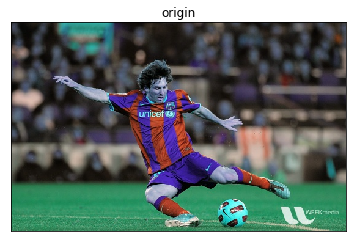

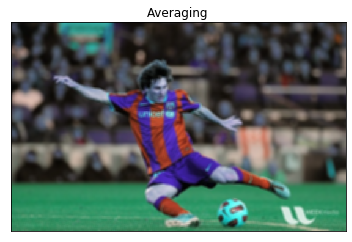

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/messi5.jpg')

kernel = np.ones((5, 5), np.float32)/25
dst = cv2.filter2D(img, -1, kernel)

plt.imshow(img, cmap='gray'), plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(dst, cmap='gray'), plt.title('Averaging'), plt.xticks([]), plt.yticks([])
plt.show()

## Image Blurring (Image Smoothing)

이미지 blurring은 loss-pass filter kernel을 통해 수행할 수 있으며 노이즈 제거에 유용하다. 사실 이는 이미지의 noise, edge와 같은 high frequency content를 제거하기 때문에 edge에도 약간의 blurring이 적용된다.(edge는 blur하지 않는 blurring 기법이 따로 있음)

OpenCV는 4가지의 blurring 기법을 제공한다.

### 1. Averaging

이미지에 normalized box filter를 적용한다. 이는 kernel 영역 아래의 모든 픽셀을 평균낸 값으로 중간 값을 대체한다. `cv2.blur()` 또는 `cv2.boxFilter()` 함수를 통해 수행할 수 있으며 kernel의 width, height를 전달해 주어야 한다. (kernel에 대해 자세한 내용은 문서를 참고)

3x3 normalized box filter는 다음과 같다.

$$
K = \frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
$$

#### Note
normalized box filter를 사용하고 싶지 않은 경우, `cv2.boxFilter()`에 인자로 `normalize=False`를 전달해서 사용하면 된다.

다음은 5x5 크기의 kernel을 적용하는 예이다.

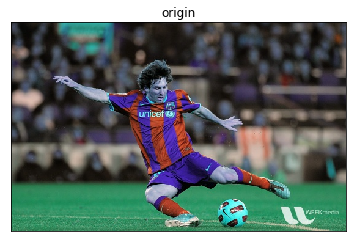

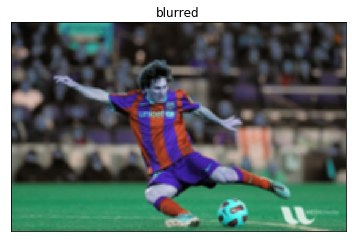

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/messi5.jpg')

blur = cv2.blur(img, (5, 5))

plt.imshow(img, cmap='gray'), plt.title('origin'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(blur, cmap='gray'), plt.title('blurred'), plt.xticks([]), plt.yticks([])
plt.show()